In [ ]:
!pip install umap-learn

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from keras.datasets import cifar10, mnist
from sklearn.decomposition import PCA
import umap

In [ ]:
# Function to load CIFAR-10 dataset
def load_cifar10():
    (x_train, y_train), (x_test, y_test) = cifar10.load_data()
    class_names = ['airplane', 'automobile', 'bird', 'cat', 'deer', 'dog', 'frog', 'horse', 'ship', 'truck']
    return x_train, y_train, x_test, y_test, class_names

# Function to load MNIST dataset
def load_mnist():
    (x_train, y_train), (x_test, y_test) = mnist.load_data()
    class_names = [str(i) for i in range(10)]
    return x_train, y_train, x_test, y_test, class_names

In [ ]:
# Function to perform Principal Component Analysis (PCA)
def apply_pca(features, n_components=3):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(features.reshape(features.shape[0], -1))
    return pca_result

# Function to perform Uniform Manifold Approximation and Projection (UMAP)
def apply_umap(features, n_components=3, n_neighbors=30, min_dist=0.1):
    umap_model = umap.UMAP(n_components=n_components, n_neighbors=n_neighbors, min_dist=min_dist)
    umap_result = umap_model.fit_transform(features.reshape(features.shape[0], -1))
    return umap_result

In [ ]:
# Function to plot 3D visualization
def plot_3d_visualization(features, labels, class_names, title):
    fig = plt.figure(figsize=(10, 8))
    ax = fig.add_subplot(111, projection='3d')
    for i in range(len(class_names)):
        indices = labels == i
        ax.scatter(features[indices, 0], features[indices, 1], features[indices, 2], label=class_names[i])
    ax.set_title(title)
    ax.legend()
    plt.show()

# Function to plot normal 2D visualization
def plot_2d_visualization(features, labels, class_names, title):
    plt.figure(figsize=(8, 6))
    for i in range(len(class_names)):
        indices = labels == i
        plt.scatter(features[indices, 0], features[indices, 1], label=class_names[i], alpha=0.5)
    plt.title(title)
    plt.legend()
    plt.show()

In [ ]:
# Load CIFAR-10 dataset
x_train_cifar10, y_train_cifar10, x_test_cifar10, y_test_cifar10, class_names_cifar10 = load_cifar10()

# Load MNIST dataset
x_train_mnist, y_train_mnist, x_test_mnist, y_test_mnist, class_names_mnist = load_mnist()

In [ ]:
# Perform PCA for CIFAR-10
pca_result_cifar10 = apply_pca(x_train_cifar10)
# Perform UMAP for CIFAR-10
umap_result_cifar10 = apply_umap(x_train_cifar10)

In [ ]:
# Perform PCA for MNIST
pca_result_mnist = apply_pca(x_train_mnist)
# Perform UMAP for MNIST
umap_result_mnist = apply_umap(x_train_mnist)

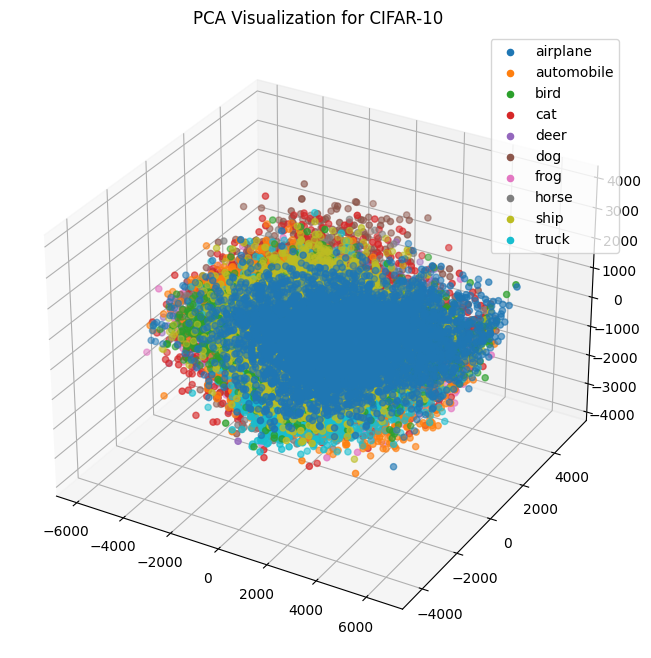

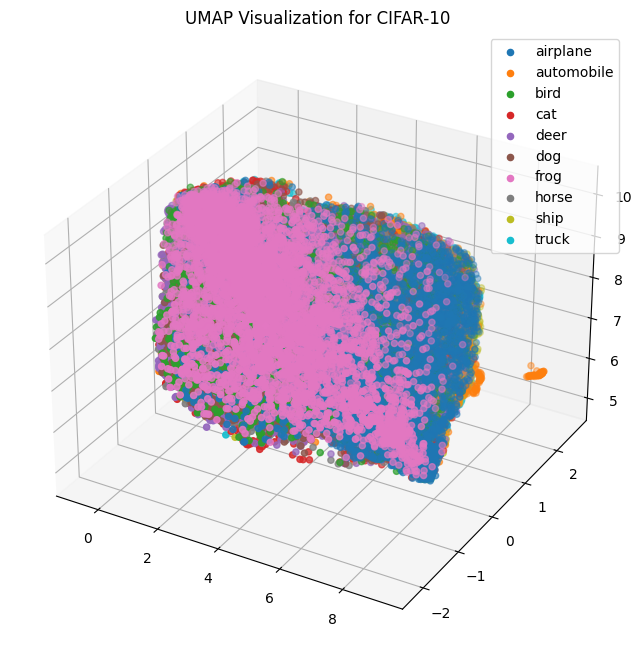

In [ ]:
# Plot 3D visualizations for CIFAR-10
plot_3d_visualization(pca_result_cifar10, y_train_cifar10.flatten(), class_names_cifar10, title="PCA Visualization for CIFAR-10")
plot_3d_visualization(umap_result_cifar10, y_train_cifar10.flatten(), class_names_cifar10, title="UMAP Visualization for CIFAR-10")

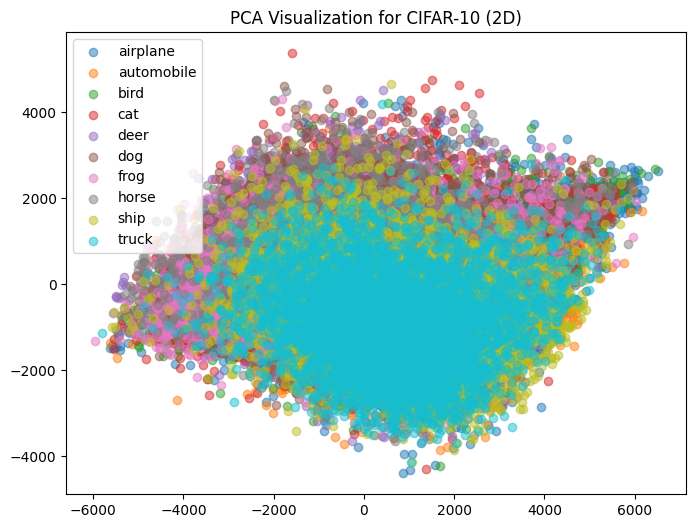

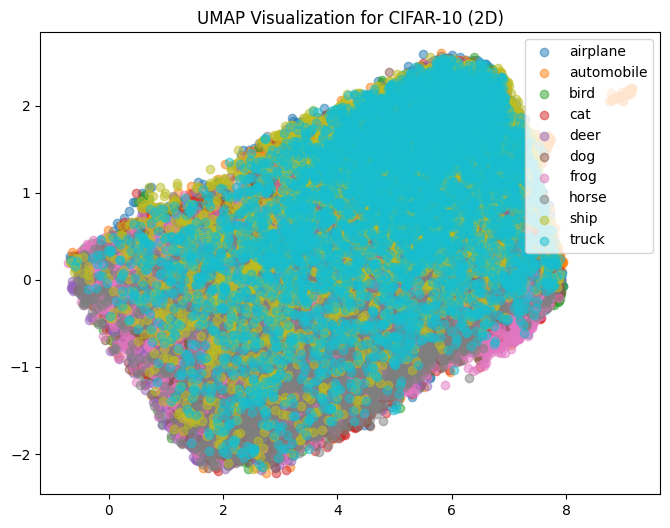

In [ ]:
# Plot normal 2D visualizations for CIFAR-10
plot_2d_visualization(pca_result_cifar10[:, :2], y_train_cifar10.flatten(), class_names_cifar10, title="PCA Visualization for CIFAR-10 (2D)")
plot_2d_visualization(umap_result_cifar10[:, :2], y_train_cifar10.flatten(), class_names_cifar10, title="UMAP Visualization for CIFAR-10 (2D)")

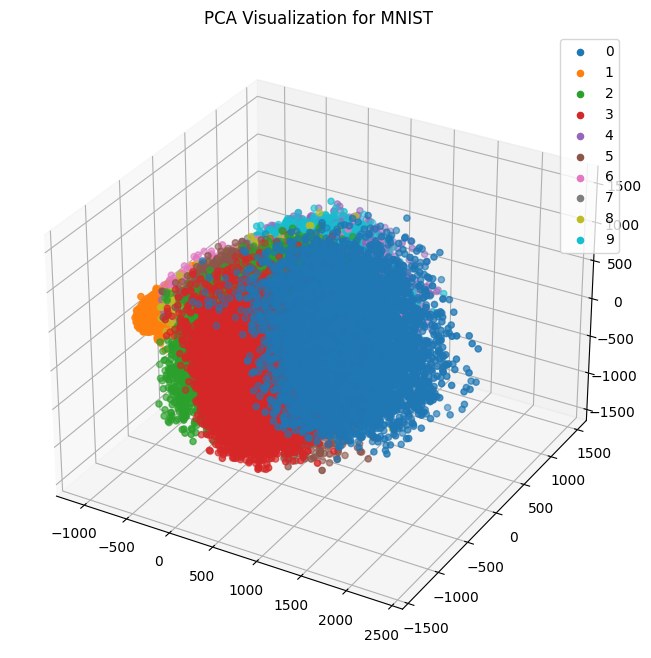

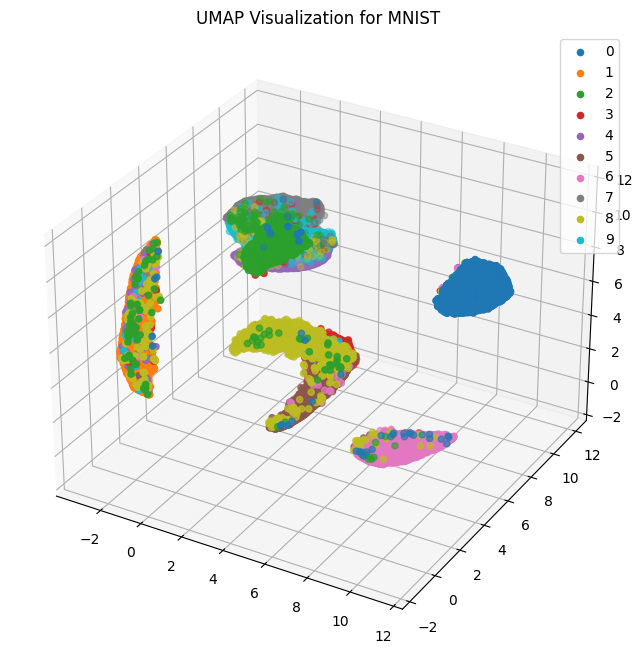

In [ ]:
# Plot 3D visualizations for MNIST
plot_3d_visualization(pca_result_mnist, y_train_mnist.flatten(), class_names_mnist, title="PCA Visualization for MNIST")
plot_3d_visualization(umap_result_mnist, y_train_mnist.flatten(), class_names_mnist, title="UMAP Visualization for MNIST")

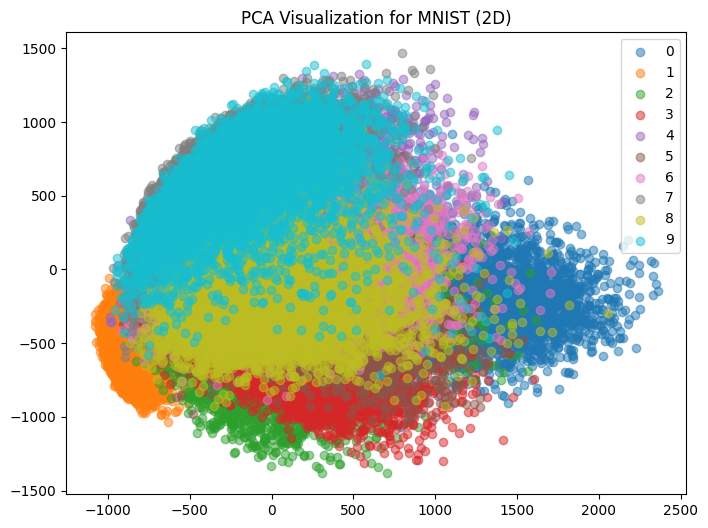

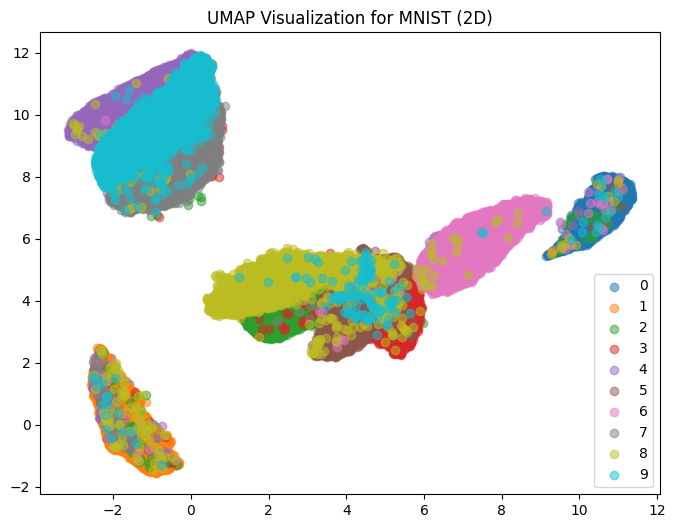

In [ ]:
# Plot normal 2D visualizations for MNIST
plot_2d_visualization(pca_result_mnist[:, :2], y_train_mnist.flatten(), class_names_mnist, title="PCA Visualization for MNIST (2D)")
plot_2d_visualization(umap_result_mnist[:, :2], y_train_mnist.flatten(), class_names_mnist, title="UMAP Visualization for MNIST (2D)")

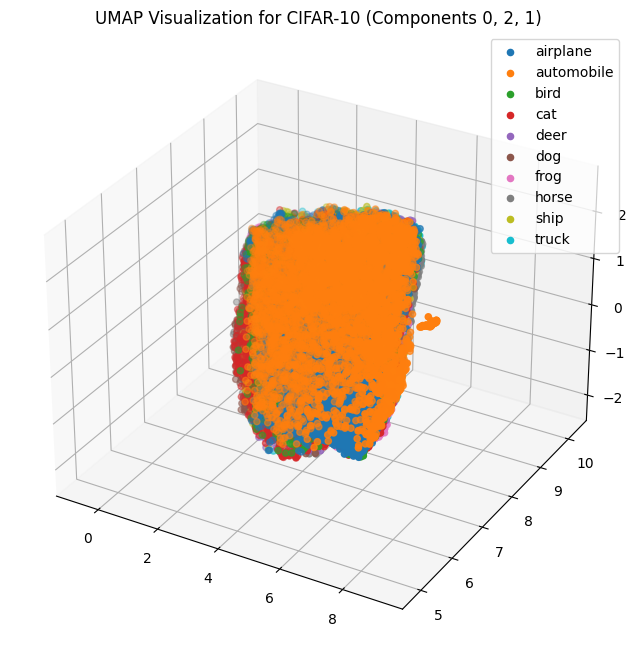

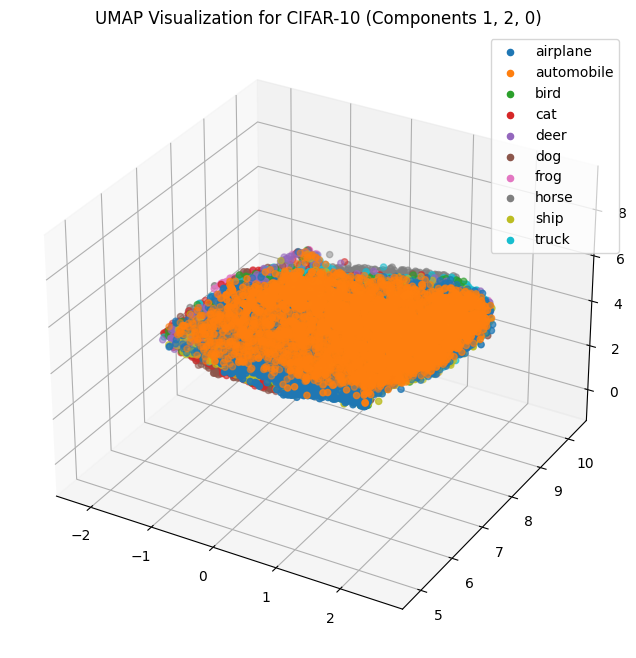

In [ ]:
# 3D visualizations for CIFAR-10
plot_3d_visualization(umap_result_cifar10[:, [0, 2, 1]], y_train_cifar10.flatten(), class_names_cifar10, title="UMAP Visualization for CIFAR-10 (Components 0, 2, 1)")
plot_3d_visualization(umap_result_cifar10[:, [1, 2, 0]], y_train_cifar10.flatten(), class_names_cifar10, title="UMAP Visualization for CIFAR-10 (Components 1, 2, 0)")

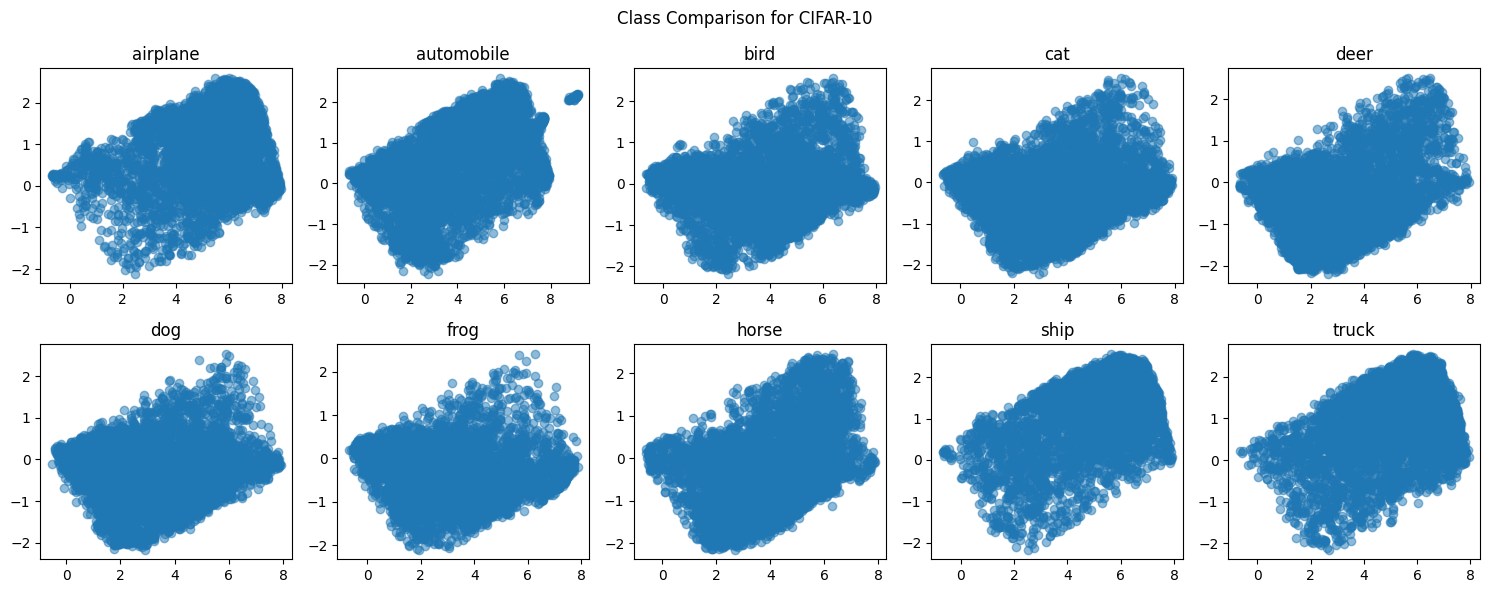

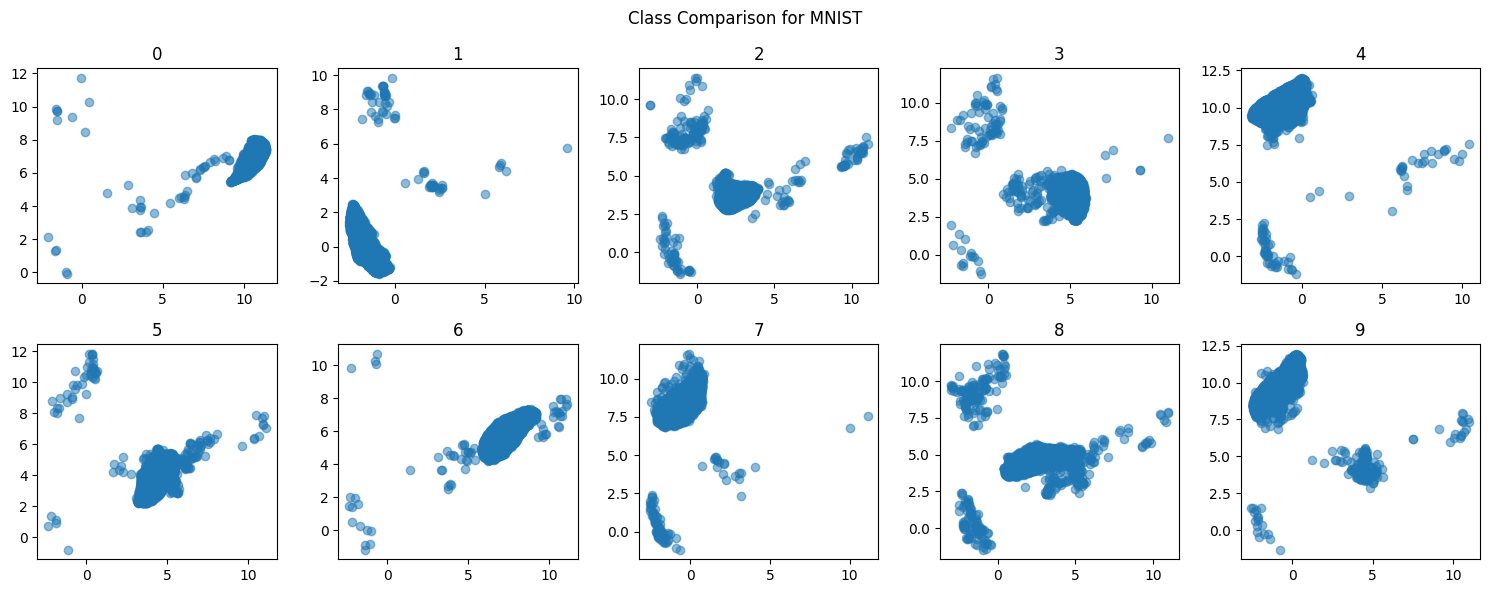

In [ ]:
# Function to plot class comparison
def plot_class_comparison(features, labels, class_names, title):
    fig, axes = plt.subplots(2, 5, figsize=(15, 6))
    for i, ax in enumerate(axes.flat):
        indices = labels == i
        ax.scatter(features[indices, 0], features[indices, 1], label=class_names[i], alpha=0.5)
        ax.set_title(class_names[i])
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot class comparison for CIFAR-10
plot_class_comparison(umap_result_cifar10[:, :2], y_train_cifar10.flatten(), class_names_cifar10, title="Class Comparison for CIFAR-10")

# Plot class comparison for MNIST
plot_class_comparison(umap_result_mnist[:, :2], y_train_mnist.flatten(), class_names_mnist, title="Class Comparison for MNIST")

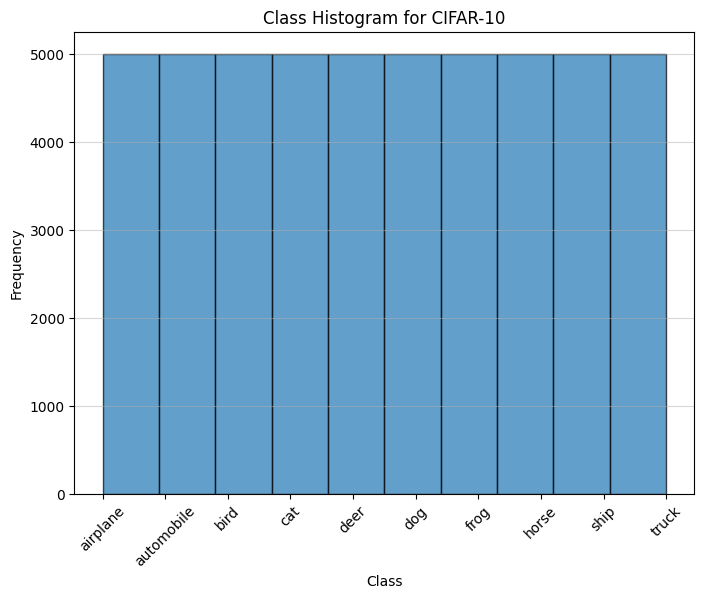

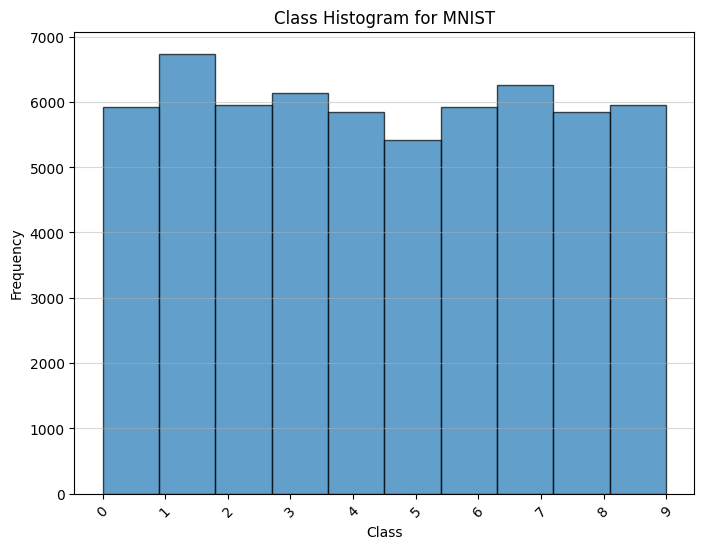

In [ ]:
# Function to plot histogram of classes
def plot_class_histogram(labels, class_names, title):
    plt.figure(figsize=(8, 6))
    plt.hist(labels, bins=len(class_names), edgecolor='black', alpha=0.7)
    plt.xticks(range(len(class_names)), class_names, rotation=45)
    plt.xlabel('Class')
    plt.ylabel('Frequency')
    plt.title(title)
    plt.grid(axis='y', alpha=0.5)
    plt.show()

# Plot histogram of classes for CIFAR-10
plot_class_histogram(y_train_cifar10.flatten(), class_names_cifar10, title="Class Histogram for CIFAR-10")

# Plot histogram of classes for MNIST
plot_class_histogram(y_train_mnist.flatten(), class_names_mnist, title="Class Histogram for MNIST")

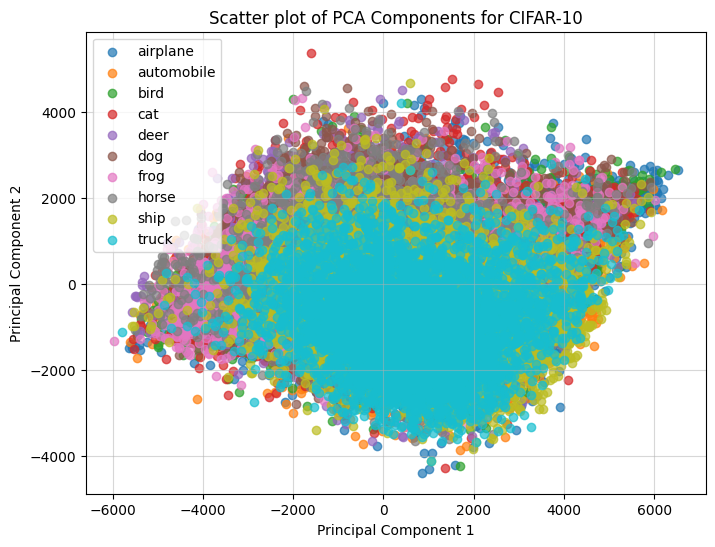

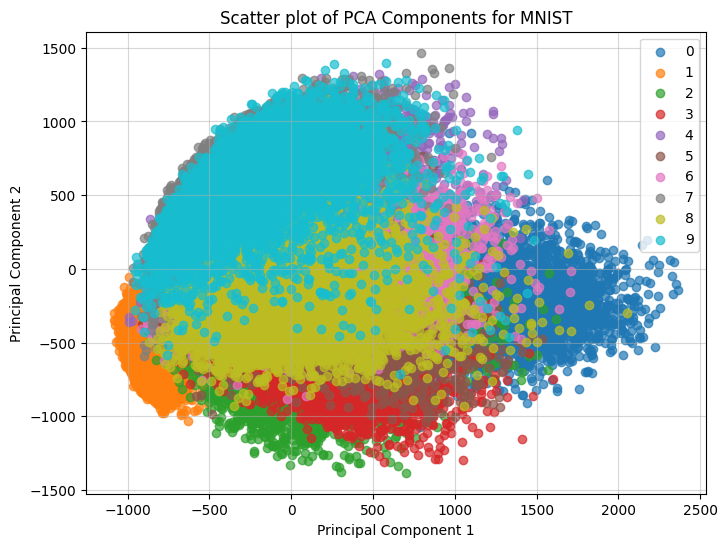

In [ ]:
# Scatter plot of the first two principal components for CIFAR-10
plt.figure(figsize=(8, 6))
for i in range(len(class_names_cifar10)):
    indices = y_train_cifar10.flatten() == i
    plt.scatter(pca_result_cifar10[indices, 0], pca_result_cifar10[indices, 1], label=class_names_cifar10[i], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of PCA Components for CIFAR-10')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

# Scatter plot of the first two principal components for MNIST
plt.figure(figsize=(8, 6))
for i in range(len(class_names_mnist)):
    indices = y_train_mnist.flatten() == i
    plt.scatter(pca_result_mnist[indices, 0], pca_result_mnist[indices, 1], label=class_names_mnist[i], alpha=0.7)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('Scatter plot of PCA Components for MNIST')
plt.legend()
plt.grid(True, alpha=0.5)
plt.show()

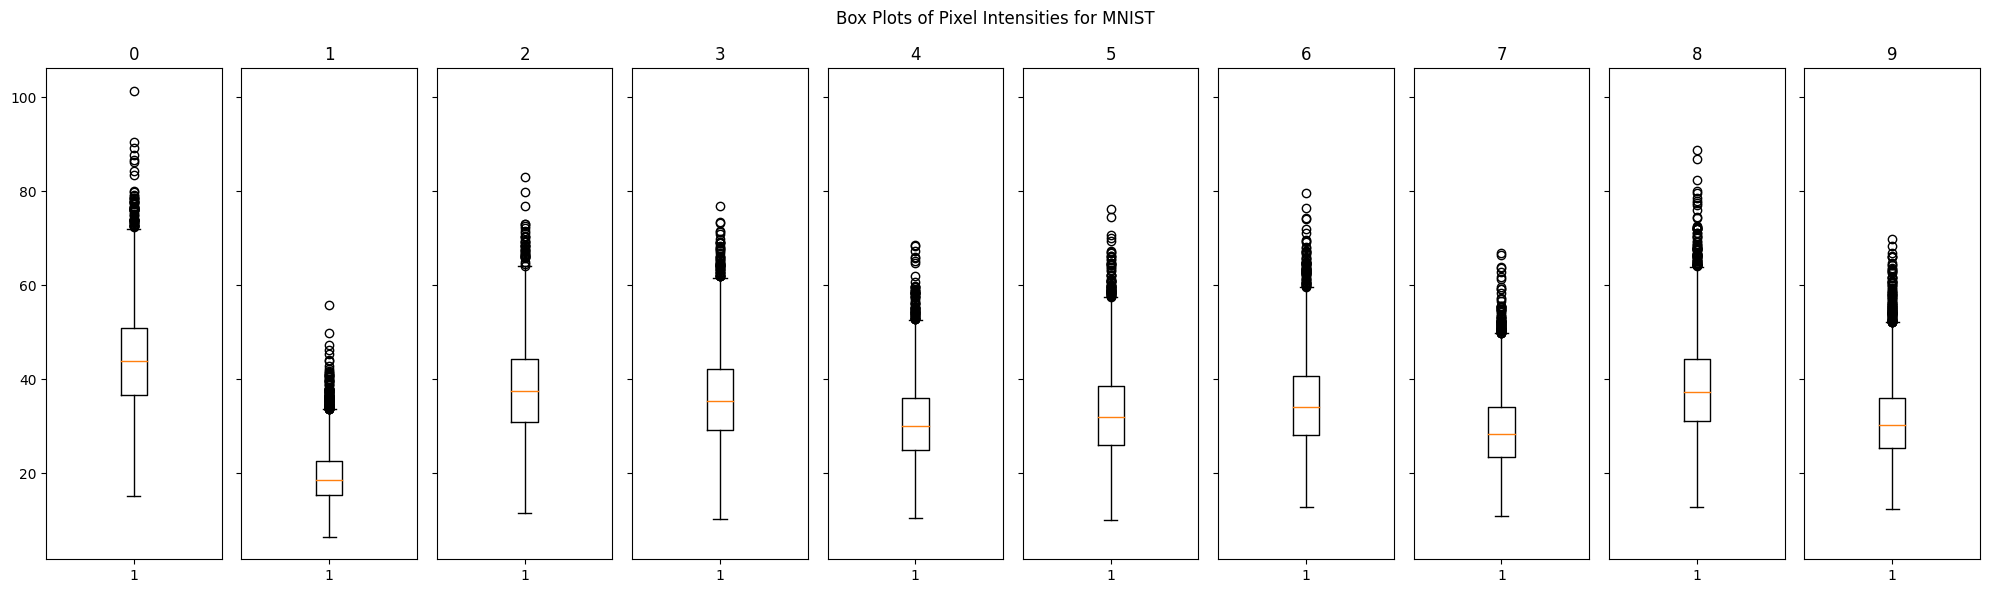

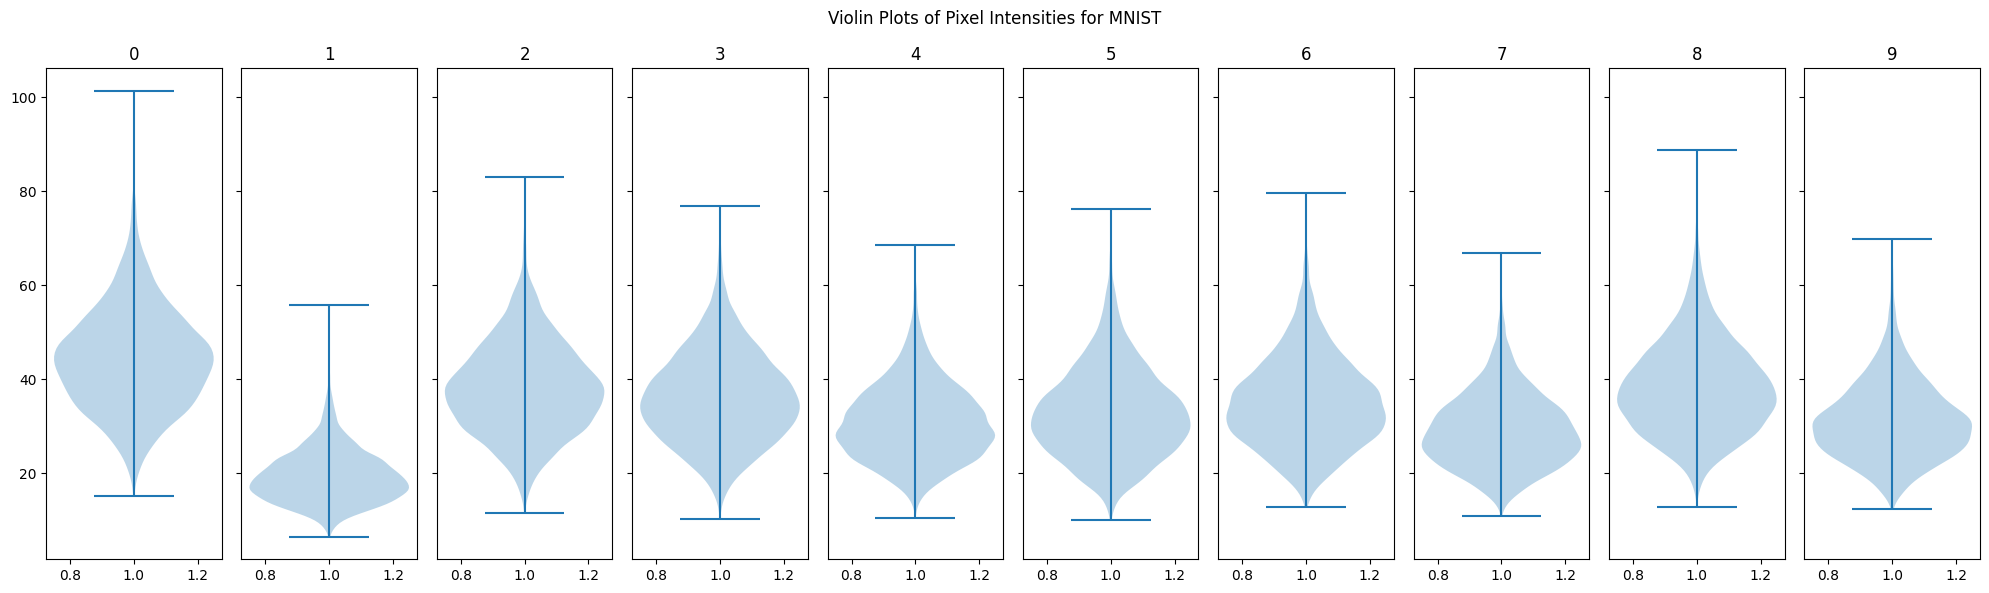

In [ ]:
# Function to plot box plots of pixel intensities
def plot_pixel_intensity_boxplots(images, labels, class_names, title):
    fig, axes = plt.subplots(1, len(class_names), figsize=(20, 6), sharey=True)
    for i, ax in enumerate(axes):
        indices = labels.flatten() == i
        ax.boxplot(images[indices].mean(axis=(1, 2)))  # Calculate mean intensity without considering channel dimension
        ax.set_title(class_names[i])
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Function to plot violin plots of pixel intensities
def plot_pixel_intensity_violinplots(images, labels, class_names, title):
    fig, axes = plt.subplots(1, len(class_names), figsize=(20, 6), sharey=True)
    for i, ax in enumerate(axes):
        indices = labels.flatten() == i
        ax.violinplot(images[indices].mean(axis=(1, 2)))  # Calculate mean intensity without considering channel dimension
        ax.set_title(class_names[i])
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot box plots of pixel intensities for MNIST
plot_pixel_intensity_boxplots(x_train_mnist, y_train_mnist, class_names_mnist, title="Box Plots of Pixel Intensities for MNIST")

# Plot violin plots of pixel intensities for MNIST
plot_pixel_intensity_violinplots(x_train_mnist, y_train_mnist, class_names_mnist, title="Violin Plots of Pixel Intensities for MNIST")

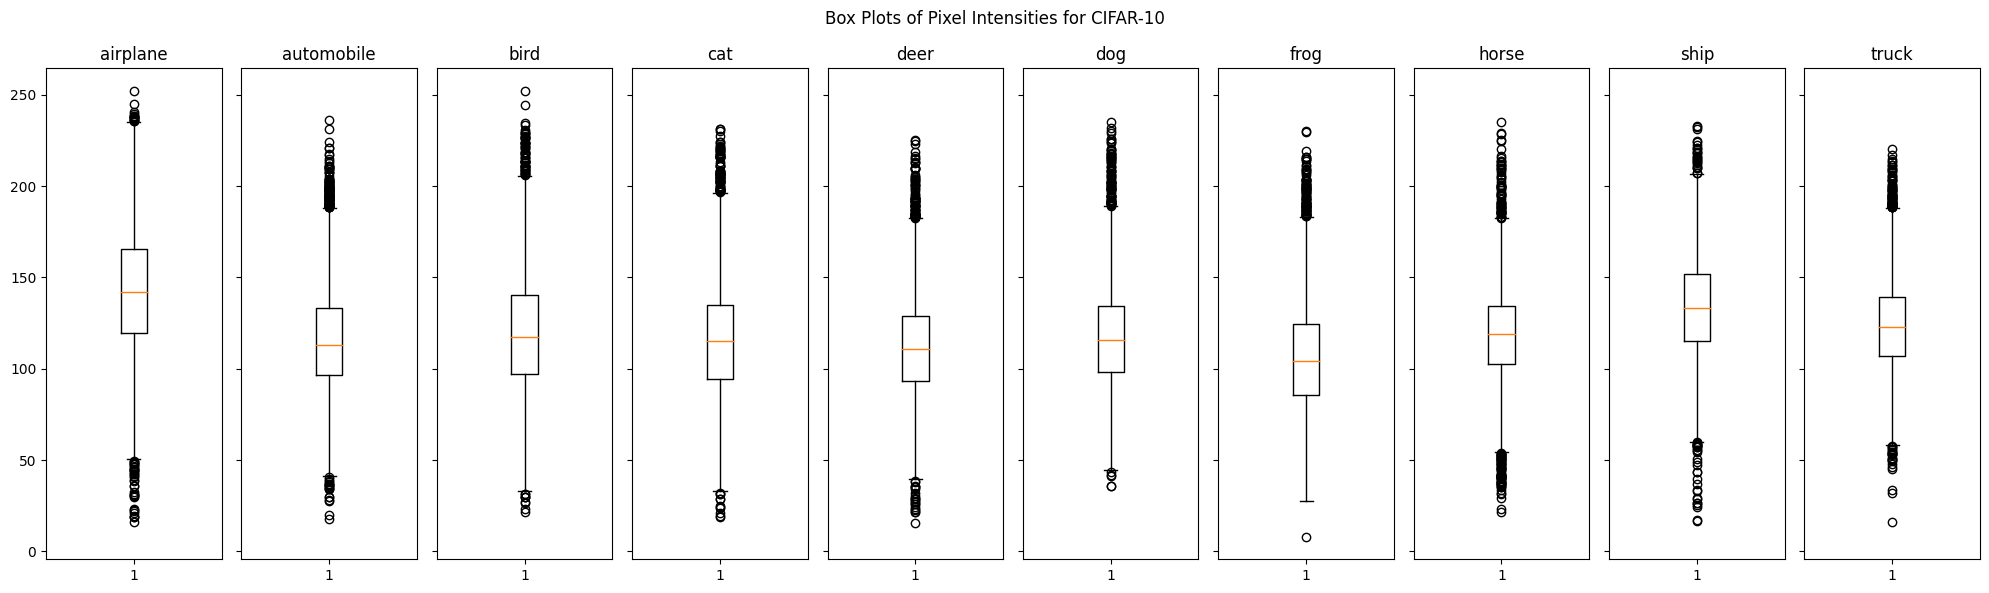

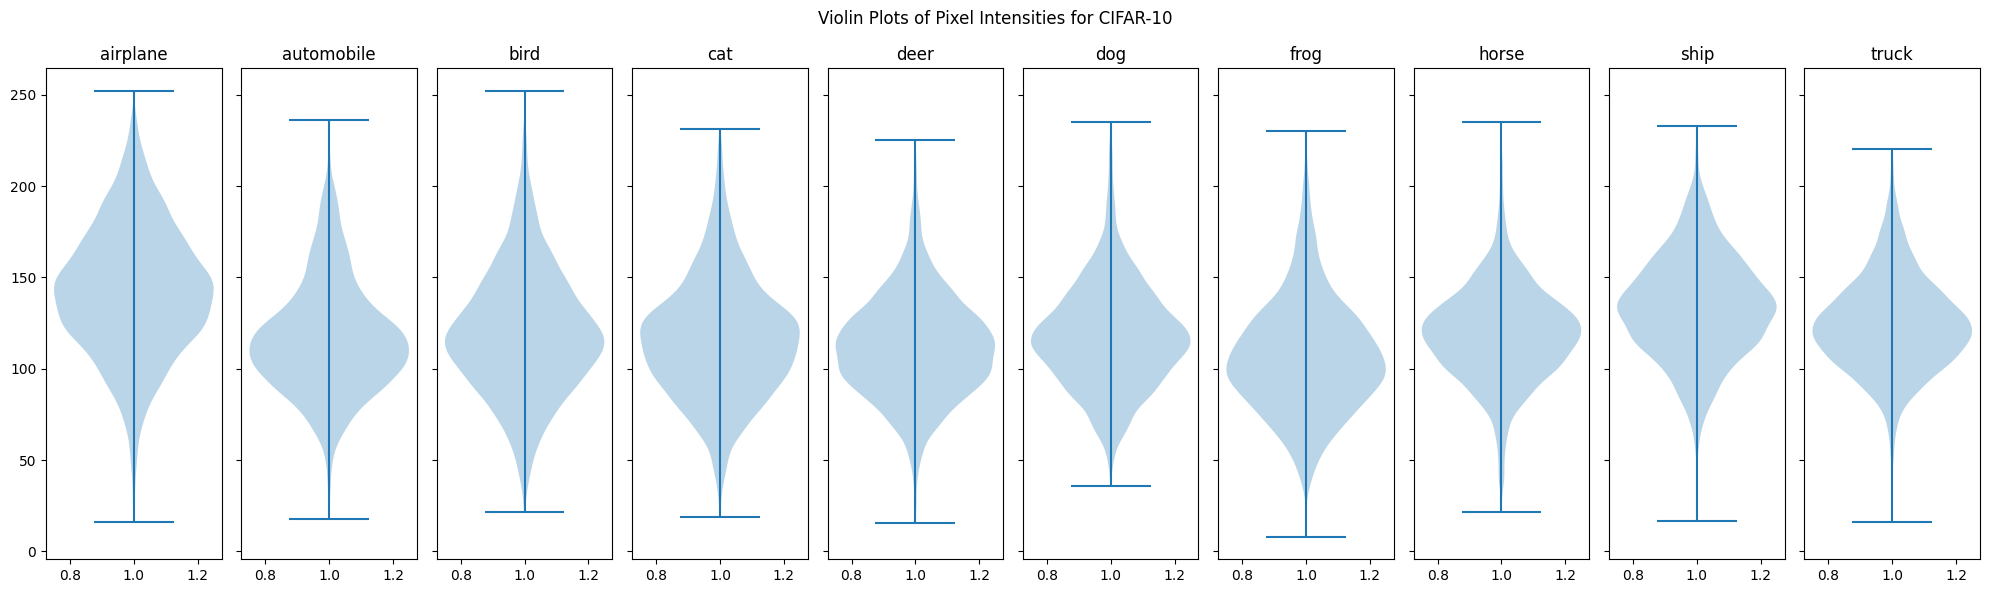

In [ ]:
# Function to plot box plots of pixel intensities
def plot_pixel_intensity_boxplots(images, labels, class_names, title):
    fig, axes = plt.subplots(1, len(class_names), figsize=(20, 6), sharey=True)
    for i, ax in enumerate(axes):
        indices = labels.flatten() == i
        ax.boxplot(images[indices].mean(axis=(1, 2, 3)))
        ax.set_title(class_names[i])
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Function to plot violin plots of pixel intensities
def plot_pixel_intensity_violinplots(images, labels, class_names, title):
    fig, axes = plt.subplots(1, len(class_names), figsize=(20, 6), sharey=True)
    for i, ax in enumerate(axes):
        indices = labels.flatten() == i
        ax.violinplot(images[indices].mean(axis=(1, 2, 3)))
        ax.set_title(class_names[i])
    fig.suptitle(title)
    plt.tight_layout()
    plt.show()

# Plot box plots of pixel intensities for CIFAR-10
plot_pixel_intensity_boxplots(x_train_cifar10, y_train_cifar10, class_names_cifar10, title="Box Plots of Pixel Intensities for CIFAR-10")

# Plot violin plots of pixel intensities for CIFAR-10
plot_pixel_intensity_violinplots(x_train_cifar10, y_train_cifar10, class_names_cifar10, title="Violin Plots of Pixel Intensities for CIFAR-10")